**Implementing pre-trained models**

In [7]:
# Import necessary libraries and rename them with specific aliases for ease of use

from tensorflow.keras.applications import VGG16 as Brain_tumorVGG
from tensorflow.keras.models import Model as Brain_tumorM

In [3]:
# Importing the additional libraries for image processing, plotting, numerical operations, and warnings management
import imageio as Brain_tumorIGo
from matplotlib import pyplot as Brain_tumorOTp
import numpy as Brain_tumorPyn
import warnings as Brain_tumorWrn
# Suppressing the warnings
Brain_tumorWrn.filterwarnings("ignore")

In [4]:
# Define the root directory for the dataset
Route_of_Image='/MRI DATA/'

In [5]:
# Define parameters for dataset preparation
Brain_Tumor_Fi_1='training'
Brain_Tumor_Fi_2='validation'
Brain_Tumor_Fi_se=2
Brain_Tumor_Fi_size=(244,244)
Brain_Tumor_Fi_div=0.2

# Import the function to load images from a directory and renaming it with a specific alias
from tensorflow.keras.utils import image_dataset_from_directory as Brain_tumorASD

# Define the image size to match the model's input shape
# Set the image size to match the input size of the VGG16 model
Brain_Tumor_Fi_size = (224, 224)
# Load training dataset from the specified directory
Brain_tumor_TT = Brain_tumorASD(
    Route_of_Image,
    validation_split=Brain_Tumor_Fi_div,
    subset=Brain_Tumor_Fi_1,
    seed=Brain_Tumor_Fi_se,
    image_size=Brain_Tumor_Fi_size,
    batch_size=100
)
# Load validation dataset from the specified directory
Brain_tumor_VV = Brain_tumorASD(
    Route_of_Image,
    validation_split=Brain_Tumor_Fi_div,
    subset=Brain_Tumor_Fi_2,
    seed=Brain_Tumor_Fi_se,
    image_size=Brain_Tumor_Fi_size,
    batch_size=100
)

Found 1311 files belonging to 4 classes.
Using 1049 files for training.
Found 1311 files belonging to 4 classes.
Using 262 files for validation.


In [6]:
# Define model parameters such as activation functions, input shape, and loss function
Brain_tumor_AA = 'tanh'
Brain_tumor_SS = (224, 224, 3)
Brain_tumor_S = 'softmax'
Brain_tumor_LL = 'SparseCategoricalCrossentropy'

# Import and initialize the Adam optimizer with a specific learning rate
from keras.optimizers import Adam as Brain_tumor_OO
Brain_tumor_OOV = Brain_tumor_OO(learning_rate=0.0001)
# Import layers for constructing a custom model
from tensorflow.keras.models import Sequential as Brain_tumorASD1
from tensorflow.keras.layers import Conv2D as Brain_tumorASD2
from tensorflow.keras.layers import MaxPooling2D as Brain_tumorASD3
from tensorflow.keras.layers import Dense as Brain_tumorASD4
from tensorflow.keras.layers import Flatten as Brain_tumorASD5
from tensorflow.keras.layers import BatchNormalization as Brain_tumorASD6

## **Pretrained Model 1 - VGG 16**

In [8]:
# Load the pretrained VGG16 model with the ImageNet weights preserved, excluding the top layer.
Brain_tumor_pre_md = Brain_tumorVGG(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


Epoch 1/5
11/11 [==============================] - 2384s 206s/step - loss: 4.1447 - accuracy: 0.3460 - val_loss: 1.0992 - val_accuracy: 0.5954
Epoch 2/5
11/11 [==============================] - 2231s 203s/step - loss: 0.9880 - accuracy: 0.5853 - val_loss: 0.7859 - val_accuracy: 0.6756
Epoch 3/5
11/11 [==============================] - 2228s 203s/step - loss: 0.8255 - accuracy: 0.6397 - val_loss: 0.7455 - val_accuracy: 0.6870
Epoch 4/5
11/11 [==============================] - 2287s 208s/step - loss: 0.6589 - accuracy: 0.7436 - val_loss: 0.5701 - val_accuracy: 0.8053
Epoch 5/5
11/11 [==============================] - 2276s 207s/step - loss: 0.5125 - accuracy: 0.7960 - val_loss: 0.5340 - val_accuracy: 0.7863
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block

<Figure size 640x480 with 0 Axes>

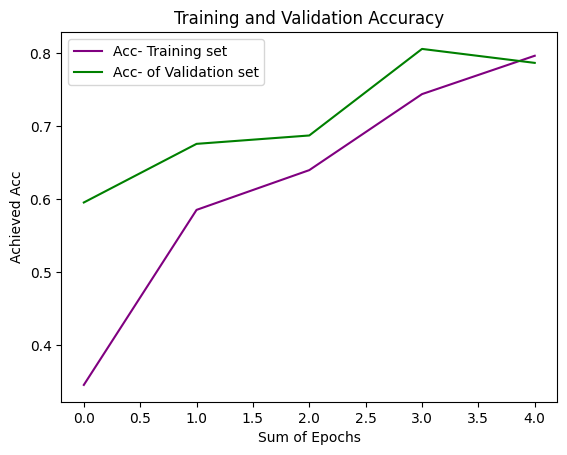

<Figure size 640x480 with 0 Axes>

In [11]:
# Download the pre-trained weights for VGG16

# Add custom layers on top of the pre-trained model to adapt it for the specific classification taskx_Brain_tumor = Brain_tumor_pre_md.output
x_Brain_tumor = Brain_tumorASD5()(x_Brain_tumor)
x_Brain_tumor = Brain_tumorASD4(1024, activation='relu')(x_Brain_tumor)
pre_Brain_tumor = Brain_tumorASD4(4, activation='softmax')(x_Brain_tumor)

# Creating the final model
melanoma_FPq = Brain_tumorM(inputs=Brain_tumor_pre_md.input, outputs=pre_Brain_tumor)

# Compiling the model with the specified optimizer, loss function, and metric
melanoma_FPq.compile(optimizer= Brain_tumor_OOV, loss= Brain_tumor_LL, metrics=['accuracy'])

# Training the model on the training dataset and validate it on the validation dataset
Brain_tumor_Hs =melanoma_FPq.fit(Brain_tumor_TT, validation_data= Brain_tumor_VV, epochs=5, batch_size=5000)

# Printing the summary of the model architecture
print(melanoma_FPq.summary())

# Ploting training and validation accuracy over epochs
Brain_tumor_EE = range(len(Brain_tumor_Hs.history['accuracy']))
Brain_tumorOTp.plot(Brain_tumor_EE, Brain_tumor_Hs.history['accuracy'], 'purple', label='Acc- Training set')
Brain_tumorOTp.plot(Brain_tumor_EE, Brain_tumor_Hs.history['val_accuracy'], 'green', label='Acc- of Validation set')
Brain_tumorOTp.xlabel('Sum of Epochs')
Brain_tumorOTp.ylabel('Achieved Acc')
Brain_tumorOTp.title('Training and Validation Accuracy')
Brain_tumorOTp.legend(loc=0)
Brain_tumorOTp.figure()